# Cargando las librerias requeridas

In [2]:
import pandas as pd
import plotnine as ptn

# Cargando datos

In [3]:
from sklearn import datasets

wine = datasets.load_wine()
print(wine.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


# Preparando los datos

In [4]:
from sklearn.preprocessing import StandardScaler

# Escalando los datos
scaler = StandardScaler()

scaled_features = scaler.fit_transform(X = wine.data)
scaled_features

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# Agglomerative Clustering

sklearn tiene varias deficiencias para este modelo. Siendo las más importantes, el definir un número de cluster y no generar un dendrograma en forma sencilla.

Es por eso que utilizaremos las funciones `linkage`, `dendrogram` y `fcluster` de la biblioteca `scipy.cluster.hierarchy`.

https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

## La función `linkage` ajusta el modelo definido y retorna un dendrograma.

``` python
modelo_linkage = linkage(y      = datos_de_distancia,
                         method = 'single',
                         metric = 'euclidean',
                         optimal_ordering = False)
```
donde:

- `y`: son los datos
- `method`: 'ward', 'complete', 'average', 'single'

## Para graficar basta con llamar a la función `dendrogram` con el modelo aprendido

``` python
dendrogram(Z             = modelo_linkage,
           p             = 30,
           truncate_mode = None)
```

donde `truncate_mode` puede ser 'None' (muestra todo el dendrograma) o 'lastp' (corta el dendrograma después de `p` ramas).

## Para extraer los clusters se utiliza la función `fcluster`

``` python
fcluster(Z         = modelo_linkage,
         t         = 8.0,
         criterion = 'distance')
```
donde:

- `Z`: el modelo generado por la función linkage
- `t`: el valor donde se quiere cortar el dendrograma
- `criterion` = 'distance'. Existen otros criterios de corte, pero `distance` es el que nos permite generar los clusters, basados en la altura que definimos.

### Ajustando (entrenado) el modelo

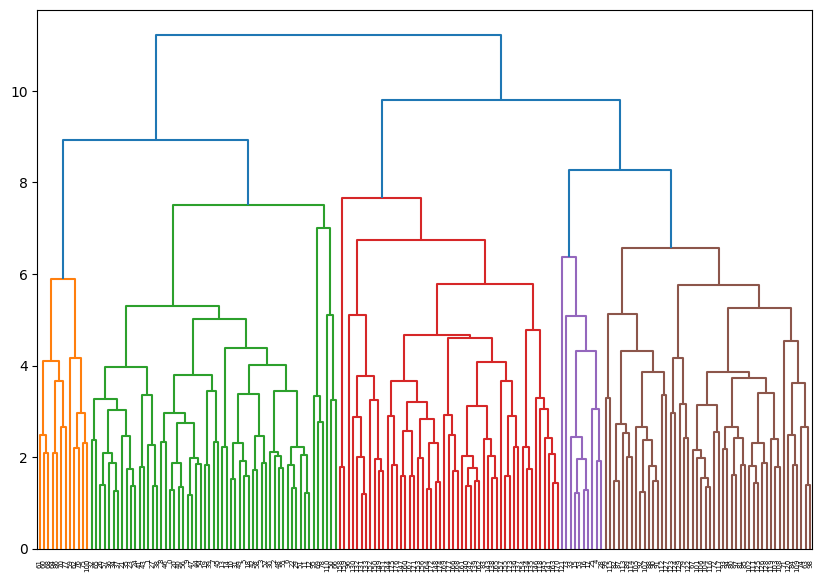

In [5]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Entrenando el modelo
modelo = shc.linkage(y      = scaled_features,
                     method = 'complete',
                     metric = 'euclidean',
                     optimal_ordering = False)

# Seteando el tamaño de la figura
plt.figure(figsize = (10, 7))

# Generando el dendrograma
objeto = shc.dendrogram(Z = modelo)

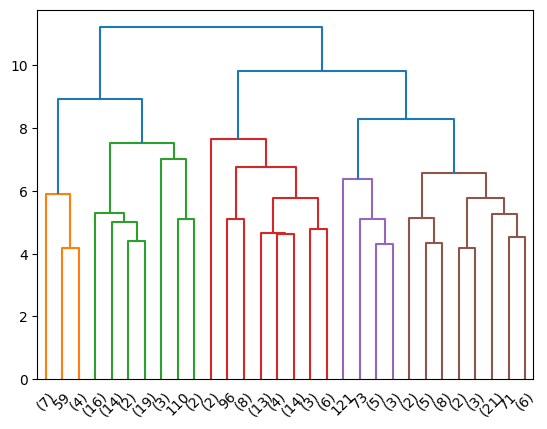

In [6]:
# Generando el dendrograma (alternativo)
objeto = shc.dendrogram(Z             = modelo,
                        p             = 30,
                        truncate_mode = "lastp")

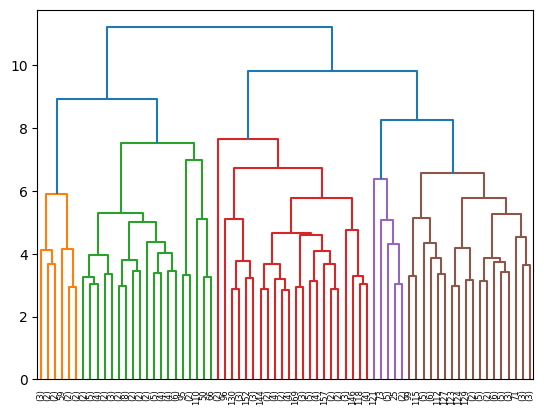

In [13]:
objeto2 = shc.dendrogram(Z             = modelo,
                        p             = 70,
                        truncate_mode = "lastp")

In [19]:
# Extrayendo los clusters sugeridos por el método
clusters = shc.fcluster(Z         = modelo,
                        t         = 9.5,
                        criterion = "distance")
clusters

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 2, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [20]:
# Aplicando PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca.fit(X = scaled_features)

pca_scaled_features_df = pca.transform(X = scaled_features)

pca_scaled_features_df = pd.DataFrame(data    = pca_scaled_features_df,
                                      columns = ["PC1", "PC2"])

pca_scaled_features_df["labels"] = clusters

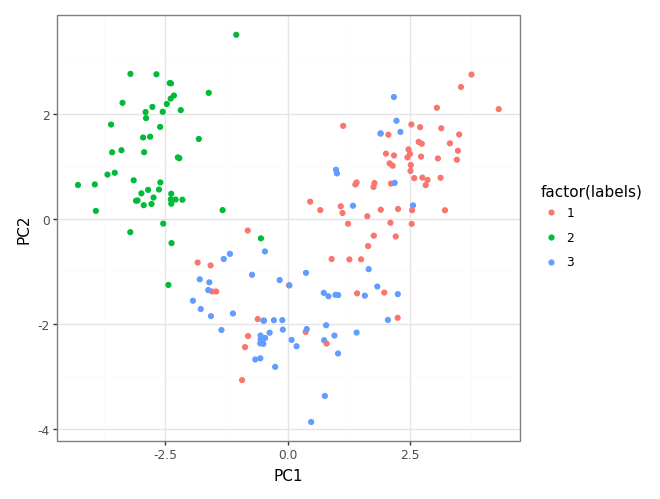

In [21]:
(
    ptn.ggplot(data = pca_scaled_features_df) +
    ptn.aes(x = "PC1", y = "PC2", color = "factor(labels)") +
    ptn.geom_point(show_legend = True) +
    ptn.theme_bw()
)

# Trabajando con variables categoricas

- En el caso de datos categóricos hay que utilizar alguna función de distancia apropiada para este tipo de datos.
- La distancia de 'hamming' corresponde al porcentaje de variables que difieren entre dos puntos.

**Ejemplo**

|  / | V1     | V2 | V3 | V4     | V5 | V6 | V7 | V8    | V9 | V10   |
|----|:------:|:--:|:--:|:------:|:--:|:--:|:--:|:-----:|:--:|:-----:|
| p1 |  **1** |  4 |  3 |  **3** |  2 |  3 | 1  | **0** | 4  | **0** |
| p2 |  **0** |  4 |  3 |  **2** |  2 |  3 | 1  | **4** | 4  | **1** |


$hamming(p1, p2) = 4/10 = 0.4$

Para ver otras posibles distancias:

https://docs.scipy.org/doc/scipy/reference/spatial.distance.html


## Cargando y preparando datos

In [22]:
# Cargando y viendo los datos
bank = pd.read_csv('C:\\mii\\DS_MII_2025-20\\data\\bank.csv',
                   sep = ";")

# Extrayendo las variables nominales
bank_nominales = bank[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']]

# Agregando edad como variable categorica
bank_nominales = bank_nominales.copy()

bank_nominales['edad'] = pd.cut(x      = bank['age'],
                                bins   = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                                labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
bank_nominales.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,edad
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,20-30
1,services,married,secondary,no,yes,yes,cellular,may,failure,30-40
2,management,single,tertiary,no,yes,no,cellular,apr,failure,30-40
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,20-30
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,50-60


In [23]:
# Transformando los datos a números
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

muestraDatosOrig = bank_nominales.apply(le.fit_transform)

muestraDatos = muestraDatosOrig.sample(1000)
muestraDatos

,job,marital,education,default,housing,loan,contact,month,poutcome,edad
752,1,1,0,0,1,0,2,8,3,2
4504,1,2,1,0,1,1,0,8,0,3
1247,4,1,2,0,1,0,0,8,3,4
2813,9,1,1,0,1,1,0,1,3,3
3527,7,0,1,0,1,0,0,10,0,2
...,...,...,...,...,...,...,...,...,...,...
3583,4,2,2,0,1,0,2,6,3,1
277,9,2,2,0,0,0,0,1,3,2
1466,0,1,2,0,0,1,0,8,3,2
2696,4,0,2,0,1,0,0,6,1,4


## Aplicando función de distancia y ajustamos modelo

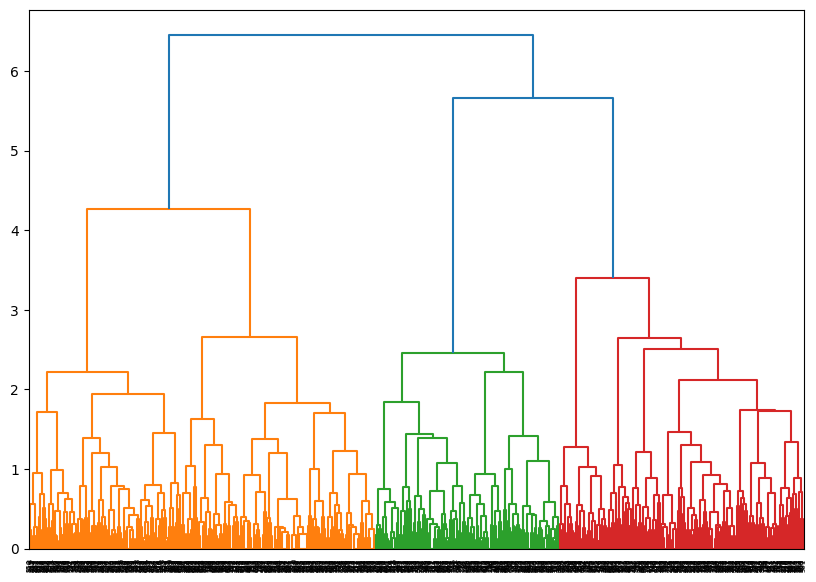

In [24]:
# Aplicamos la función de distancia de scipy correspondiente a la distancia de Hamming
from scipy.spatial.distance import pdist

distCategorica = pdist(X      = muestraDatos,
                       metric = 'hamming')

# Entrenando el modelo
modelo = shc.linkage(y      = distCategorica,
                     method = 'ward')

# Seteando el tamaño de la figura
plt.figure(figsize = (10, 7))

# Generando el dendrograma
objeto = shc.dendrogram(modelo)

## Seleccionando cantidad de clusters y obteniendo centros

In [25]:
# Seleccionando 3 clusters
clusters = shc.fcluster(Z         = modelo,
                        t         = 4.5,
                        criterion = "distance")

# Decoding
for i in pd.unique(clusters):

    modeVector = muestraDatos.iloc[clusters == i, :].mode()
    
    for j in range(muestraDatos.shape[1]):

        le.fit(bank_nominales.iloc[:, j])

        print(list(le.inverse_transform([modeVector.iloc[0, j]])), " ", end = "")
    
    print("")

# Si hay un error es por que una moda tiene dos valores

['blue-collar']  ['married']  ['secondary']  ['no']  ['yes']  ['no']  ['cellular']  ['may']  ['unknown']  ['30-40']  
['management']  ['married']  ['tertiary']  ['no']  ['yes']  ['no']  ['cellular']  ['may']  ['unknown']  ['30-40']  
['technician']  ['married']  ['secondary']  ['no']  ['no']  ['no']  ['cellular']  ['jul']  ['unknown']  ['50-60']  
